<a href="https://colab.research.google.com/github/zaidsallam10/Principle_Component_Analysis/blob/master/Principle_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# PCA: principle component analysis
# unsupervised machine learning algorithm
# used as a dimntionallity reduction technique
# Ex: convert from 3D to 2D
# Why PCA ? to reduce memory consuming and time processing
# it may led to lose data/features.


# We select Eigen vector that has largest covariance value because no overlapping
# PC1: is Eigen vector that has largest Eigen value
# PC2: is Eigen vector that has smaller Eigen value than PC1

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Creating data fram
df = pd.DataFrame(columns=['calory','breakfast','lunch','dinner','exercise','body_shape'])
df.loc[0]=[1200,1,0,0,2,'Skinny']
df.loc[1]=[2800,1,1,1,1,'Normal']
df.loc[2]=[3500,2,2,1,0,'Fat']
df.loc[3]=[1400,0,1,0,3,'Skinny']
df.loc[4]=[5000,2,2,2,0,'Fat']
df.loc[5]=[1300,0,0,1,2,'Skinny']
df.loc[6]=[3000,1,0,1,1,'Normal']
df.loc[7]=[4000,2,2,2,0,'Fat']
df.loc[8]=[2600,0,2,0,0,'Normal']
df.loc[9]=[3000,1,2,1,1,'Fat']
df


,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [15]:
# Split features in X

X=df[['calory','breakfast','lunch','dinner','exercise']]
X

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0
9,3000,1,2,1,1


Text(0.5, 1.0, 'PCA 1D result')

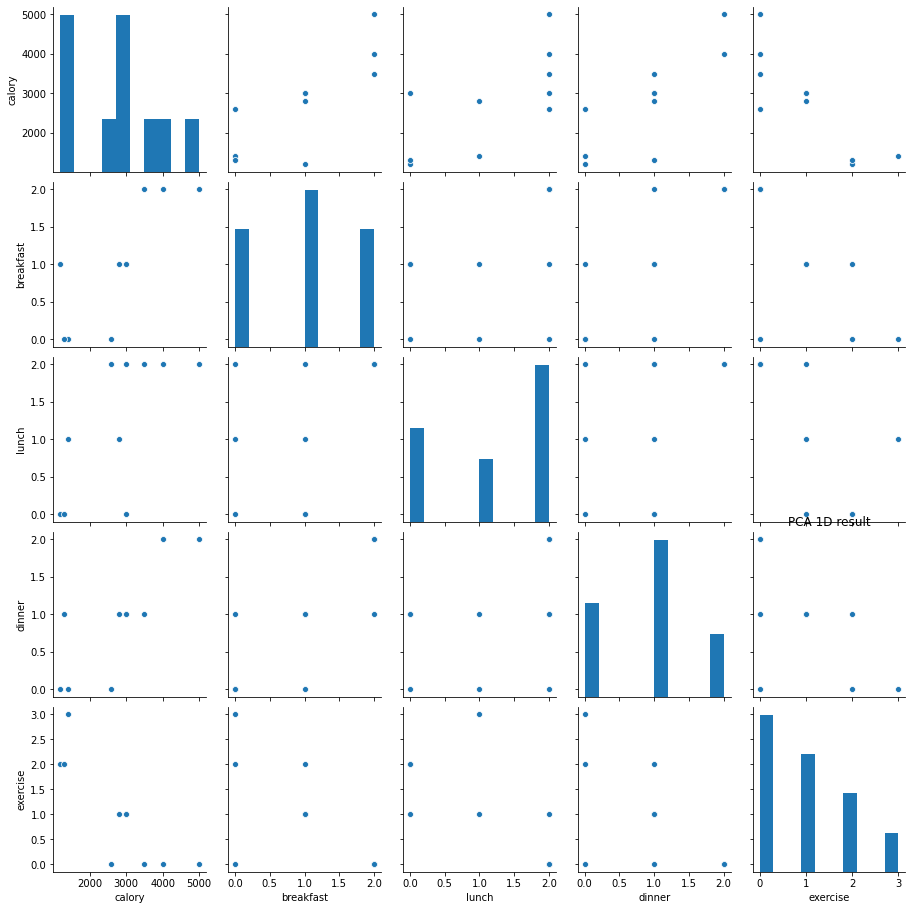

In [41]:
# plotting 5D

sns.pairplot(data=X)
plt.title("PCA 1D result")

In [16]:
# Split label in y
y=df[['body_shape']]
y

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


In [17]:
# Scalling data
from sklearn.preprocessing import StandardScaler
X_scalled =StandardScaler().fit_transform(X)
X_scalled

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [24]:
# convariance matrix
features=X_scalled.T
convariance_matrix=np.cov(features)
convariance_matrix

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.93179808],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.71721914],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.76471911],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.63492063],
       [-0.93179808, -0.71721914, -0.76471911, -0.63492063,  1.11111111]])

In [26]:
# Eigen Vectors and Eigen values from covariance matrix
eig_vals,eig_vecs=np.linalg.eig(convariance_matrix)
print("eig_vals",eig_vals)

eig_vals [4.0657343  0.8387565  0.07629538 0.27758568 0.2971837 ]


In [27]:
print("eig_vecs",eig_vecs)

eig_vecs [[-0.508005   -0.0169937  -0.84711404  0.11637853  0.10244985]
 [-0.44660335 -0.36890361  0.12808055 -0.63112016 -0.49973822]
 [-0.38377913  0.70804084  0.20681005 -0.40305226  0.38232213]
 [-0.42845209 -0.53194699  0.3694462   0.22228235  0.58954327]
 [ 0.46002038 -0.2816592  -0.29450345 -0.61341895  0.49601841]]


In [29]:
print('eig_vals[0] has 73% vairance so we will choose eig_vals[0]',eig_vals[0]/sum(eig_vals))

eig_vals[0] has 73% vairance so we will choose eig_vals[0] 0.7318321731427544


In [51]:
projected_x= X_scalled.dot(eig_vecs.T[0])
new_data_frame=pd.DataFrame(projected_x,columns=['PC1'])
new_data_frame['y-axis']=0
new_data_frame['label']=y
new_data_frame

# so its reduced to 1D which is the PC1 only
# y-axis exists because we can plot 1D on seaborn 

,PC1,y-axis,label
0,2.226009,0,Skinny
1,0.018143,0,Normal
2,-1.762966,0,Fat
3,2.735424,0,Skinny
4,-3.027115,0,Fat
5,2.147026,0,Skinny
6,0.371425,0,Normal
7,-2.592399,0,Fat
8,0.393478,0,Normal
9,-0.509025,0,Fat


Text(0.5, 1.0, 'PCA 1D result')

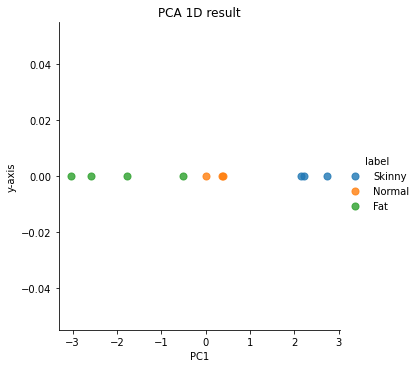

In [52]:

sns.lmplot('PC1','y-axis',data=new_data_frame,fit_reg=False,scatter_kws={"s":50},hue="label")
plt.title("PCA 1D result")

X_scalled= (10, 5)
explained_variance_ = [4.0657343]
explained_variance_ratio_ = [0.73183217]
singular_values_array = [6.04909982]


Text(0.5, 1.0, 'PCA 1D result from sikit-learn')

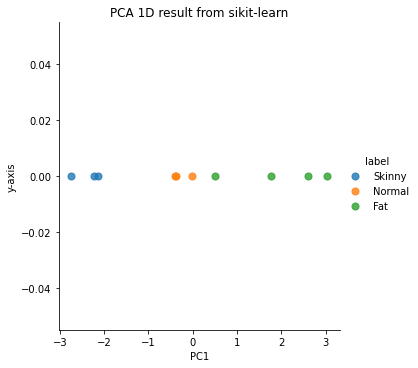

In [88]:
# Implementing PCA using sikit-learn
from sklearn import decomposition

print("X_scalled=",X_scalled.shape)
pca =decomposition.PCA(n_components=1)
pca_result=pca.fit_transform(X_scalled)

print("explained_variance_ =",pca.explained_variance_)
print("explained_variance_ratio_ =",pca.explained_variance_ratio_)
print("singular_values_array =",pca.singular_values_)


sikitlearn_pca_frame=pd.DataFrame(pca_result,columns=['PC1'])
sikitlearn_pca_frame['y-axis']=0
sikitlearn_pca_frame['label']=y



sns.lmplot('PC1','y-axis',data=sikitlearn_pca_frame,fit_reg=False,scatter_kws={"s":50},hue="label")
plt.title("PCA 1D result from sikit-learn")